# Basic Imports

In [1]:
import numpy as np  #load up the libraries and object defs. we need
import pandas as pd
from pandas import DataFrame, Series

# load up my visualization system, and call the object plt
import matplotlib.pyplot as plt

# tell ipython notebook to print visualizations inline
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


# Load Data

In [2]:
# A subset of data from the OECD Better Life Index (...and an incomplete one at that)
df = pd.read_excel('BetterLifeIndex.xlsx',skiprows=2) # Drop the non-data rows at the top

In [3]:
df.head(5) # Get a quick sample

,Country,Employment rate,Long-term unemployment rate,Student skills,Years in education,Air pollution,Water quality,Life expectancy,Life satisfaction,Feeling safe walking alone at night,Homicide rate
0,Australia,72,1.32,512,19.2,6,94,82.2,7.3,62.6,0.8
1,Austria,71,1.53,500,17.1,15,93,81.2,7.1,81.2,0.4
2,Belgium,62,4.26,509,18.8,19,83,80.7,6.9,69.6,1.1
3,Canada,72,0.89,522,16.3,12,90,81.5,7.4,81.7,1.5
4,Chile,62,1.67,436,17.1,18,71,78.8,6.5,50.2,3.8


In [4]:
# We can do math with these
df["Homicide rate"] + df["Feeling safe walking alone at night"] 

0     63.4
1     81.6
2     70.7
3     83.2
4     54.0
5     71.0
6     85.5
7     72.0
8     87.3
9     71.2
10    75.1
11    64.0
12    54.4
13    78.4
14    77.8
15    68.1
16    60.1
17    70.5
18    68.8
19    67.7
20    70.8
21    63.3
22    81.3
23    65.6
24    90.6
25    67.1
26    70.1
27    63.3
28    84.3
29    82.2
30    77.6
31    87.9
32    62.1
33    78.0
34    79.1
dtype: float64

In [5]:
# We might want to consider normalizing these so they're weighted more evenly
hr = df["Homicide rate"] 
df["Homicide rate (normalized)"] = (hr-hr.min())/(hr.max()-hr.min())

lr = df["Feeling safe walking alone at night"]
df["Feeling safe walking alone at night (normalized)"] = (lr-lr.min())/(lr.max()-lr.min())
df.sample(5)

,Country,Employment rate,Long-term unemployment rate,Student skills,Years in education,Air pollution,Water quality,Life expectancy,Life satisfaction,Feeling safe walking alone at night,Homicide rate,Homicide rate (normalized),Feeling safe walking alone at night (normalized)
15,Israel,68,0.63,474,15.9,26,65,82.1,7.1,66.3,1.8,0.068966,0.531187
20,Luxembourg,67,1.60,490,15.1,15,85,81.9,6.7,70.6,0.2,0.000000,0.617706
11,Greece,49,19.47,466,18.5,15,69,81.4,5.6,62.5,1.5,0.056034,0.454728
5,Czech Republic,69,2.72,500,17.4,17,88,78.3,6.6,70.1,0.9,0.030172,0.607646
6,Denmark,73,1.66,498,19.6,11,95,80.4,7.5,85.2,0.3,0.004310,0.911469


In [6]:
# A different way to perform computations on a whole column
df[['Homicide rate']].apply(lambda x: (x - x.mean()) / (x.max() - x.min())) # (here normalized distance from the mean)

,Homicide rate
0,-0.050739
1,-0.067980
2,-0.037808
3,-0.020567
4,0.078571
5,-0.046429
6,-0.072291
7,0.121675
8,-0.020567
9,-0.059360


In [7]:
# In case you want to index by country (remember that this creates a copy of the DataFrame)
df.set_index('Country')

,Employment rate,Long-term unemployment rate,Student skills,Years in education,Air pollution,Water quality,Life expectancy,Life satisfaction,Feeling safe walking alone at night,Homicide rate,Homicide rate (normalized),Feeling safe walking alone at night (normalized)
Country,,,,,,,,,,,,
Australia,72,1.32,512,19.2,6,94,82.2,7.3,62.6,0.8,0.025862,0.456740
Austria,71,1.53,500,17.1,15,93,81.2,7.1,81.2,0.4,0.008621,0.830986
Belgium,62,4.26,509,18.8,19,83,80.7,6.9,69.6,1.1,0.038793,0.597586
Canada,72,0.89,522,16.3,12,90,81.5,7.4,81.7,1.5,0.056034,0.841046
Chile,62,1.67,436,17.1,18,71,78.8,6.5,50.2,3.8,0.155172,0.207243
Czech Republic,69,2.72,500,17.4,17,88,78.3,6.6,70.1,0.9,0.030172,0.607646
Denmark,73,1.66,498,19.6,11,95,80.4,7.5,85.2,0.3,0.004310,0.911469
Estonia,70,3.32,526,17.8,9,84,77.3,5.6,67.2,4.8,0.198276,0.549296
Finland,69,1.97,529,19.7,7,94,81.1,7.4,85.8,1.5,0.056034,0.923541


# Question 1
What country is the safest?

*Remember, you should be able to clearly **present** the result to an audience (and have them understand how you got it.)*

In [8]:
country_df = df.set_index("Country")
def rowCalc(row):
    return row["Feeling safe walking alone at night (normalized)"] - row["Homicide rate (normalized)"]

safety = country_df[['Feeling safe walking alone at night (normalized)','Homicide rate (normalized)']].copy()
safety['Safety'] = safety.apply(lambda row: rowCalc(row), axis=1)
maxCol = safety['Safety'].idxmax()
safety[maxCol:maxCol]

,Feeling safe walking alone at night (normalized),Homicide rate (normalized),Safety
Country,,,
Norway,1.0,0.034483,0.965517


# Question 2
On average what is the **life satisfaction** of the five countries with the **most years in education**?

In [9]:
country_data = country_df.sort_values(['Years in education'], ascending=False)
top5Edu = country_data.head(n=5)
print(top5Edu[['Life satisfaction','Years in education']])
print()
print("Average life satisfaction for countries with most years in education: " + str(top5Edu['Life satisfaction'].mean()))

           Life satisfaction  Years in education
Country                                         
Finland                  7.4                19.7
Denmark                  7.5                19.6
Iceland                  7.5                19.6
Australia                7.3                19.2
Sweden                   7.3                19.1

Average life satisfaction for countries with most years in education: 7.4


# Question 3
What is the distribution of life expectancy across OECD countries?
Are there other indicators with similar distributions? Do you think they are related?

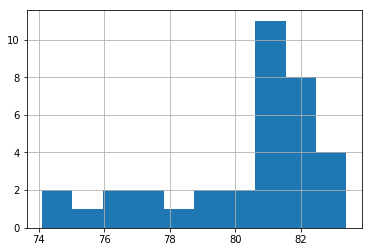

In [10]:
country_df["Life expectancy"].hist()

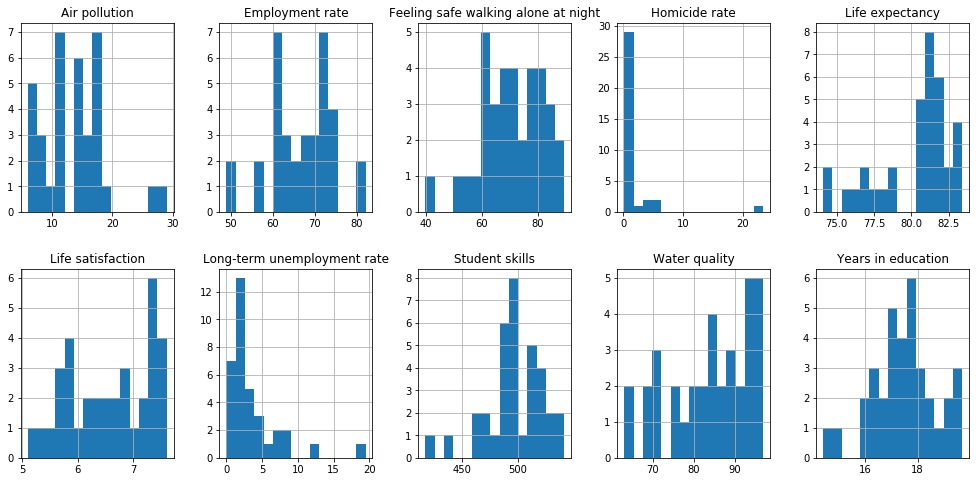

In [11]:
_ = country_df[['Employment rate','Long-term unemployment rate','Student skills','Years in education','Air pollution','Water quality','Life expectancy','Life satisfaction','Feeling safe walking alone at night','Homicide rate']].hist(bins=15,figsize=(17,8),layout=(2,5))

# Question 4
{Your choice}

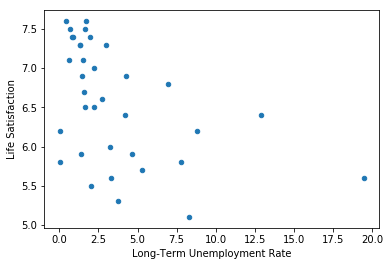

In [12]:
#Pulling data out of main file.
pull = df.sort_values('Life satisfaction', ascending=False)

#Information being put into a frame.
country = pull['Country']
unemploymentRate = pull['Long-term unemployment rate']
lifeSatisfaction = pull['Life satisfaction']

lSat = pd.DataFrame({'Country': country, 
                     'Long-Term Unemployment Rate': unemploymentRate, 
                     'Life Satisfaction': lifeSatisfaction})
lSat = lSat.set_index('Country')

#Show results.
lSat.plot(kind="scatter", x="Long-Term Unemployment Rate", y="Life Satisfaction")

# Question 5
{Your choice}